# Bloque 2 - Unidad 02 - Ajuste de datos y regresión lineal.

SciPy es una biblioteca de código abierto en Python utilizada para la computación científica y técnica. Se basa en NumPy y ofrece una amplia gama de algoritmos y herramientas para matemáticas, ciencia e ingeniería. SciPy incluye módulos para optimización, integración, interpolación, álgebra lineal, estadística, y más. Es comúnmente empleada para resolver problemas matemáticos complejos, realizar análisis de datos y llevar a cabo experimentos en áreas como el aprendizaje automático, procesamiento de señales y física. Por su funcionalidad y facilidad de uso, SciPy es fundamental en el ecosistema de Python para la investigación científica y el análisis de datos.

Documentación: https://docs.scipy.org/doc/scipy/

Código fuente: https://github.com/scipy/scipy



In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn.objects as so

## Entendiendo SSE usando el valor medio

1. Generá un conjunto de 10 números al azar con distribución normal, valor medio 8 y desviación estandar 1.5.
2. Calculá el valor medio de la distribución obtenida.
3. Escribí una función que dado un valor medio propuesto, calcule SSE
para estos datos.

**Para discutir en grupo**: Para escribir el SSE necesito la incerteza (que entra en la desviación estandar) de los datos. Si no la conozco, ¿Qué hago? ¿Cómo afecta el resultado?

4. Graficá el valor de SSE en función del valor medio propuesto.
5. ¿Para qué valor la curva es mínima?

**Para pensar y probar**: ¿Cómo cambia esto si genero datos con una distribución lognormal? ¿Qué pasa si el valor medio simulado es bajo o alto?

In [ ]:
rng = np.random.default_rng()
numeros_random=rng.normal(8,1.5,10)
print(numeros_random)
valor_medio_=np.mean(numeros_random)
print(valor_medio_)
def sse(mediciones, desviaciones_estandar, valor_a_ajustar): #sse ponderado
    return np.sum(((mediciones - valor_a_ajustar)**2)/desviaciones_estandar**2)

[8.23595432 6.33334731 8.59431068 8.55649592 7.10282554 9.3318679
 8.4208873  6.85610668 7.42952154 9.08597491]
7.994729211614787


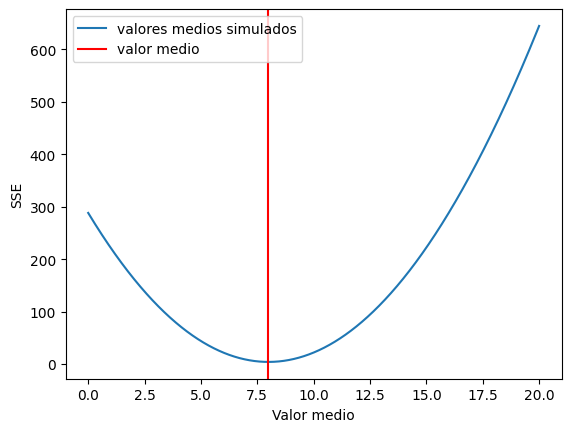

In [ ]:
valores_medios=np.linspace(0,20,10000)
desviaciones_estandar=np.array([1.5]*10)
sse_valores_medios=[] #vectorizar
for valor_medio in valores_medios:
    sse_valores_medios.append(sse(numeros_random,desviaciones_estandar,valor_medio))
plt.plot(valores_medios,sse_valores_medios,label="valores medios simulados")
plt.axvline(valor_medio_,color="red",label="valor medio")
plt.xlabel("Valor medio")
plt.ylabel("SSE")
plt.legend()
plt.show()


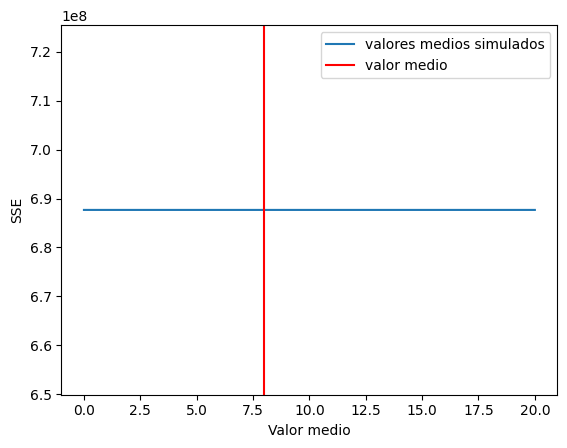

In [ ]:
numeros_random_lognormal=rng.lognormal(8,1.5,10)
valor_medio_lognormal=np.mean(numeros_random_lognormal)
valores_medios=np.linspace(0,20,10000)
desviaciones_estandar=np.array([1.5]*10)
sse_valores_medios=[] #vectorizar
for valor_medio in valores_medios:
    sse_valores_medios.append(sse(numeros_random_lognormal,desviaciones_estandar,valor_medio_lognormal))
plt.plot(valores_medios,sse_valores_medios,label="valores medios simulados")
plt.axvline(valor_medio_,color="red",label="valor medio")
plt.xlabel("Valor medio")
plt.ylabel("SSE")
plt.legend()
plt.show() #hay mayor rango de valores aceptables, uno podria pensar q hay mas error

## Entendiendo SSE usando una recta

1. Escribí una función que dado $x$, la pendiente ($m$) y la ordenada al origen ($b$) devuelva el valor y de la recta.
2. Generá y grafica un conjunto con 10 datos.
3. Calculá la varianza de $x$ e $y$, la covarianza y el coeficiente de correlación.
4. Escribí una función que dado un valor propuesto para $m$ y $b$ calcule SSE para estos datos.
5. Fijando $b$ en el valor simulado, graficá el valor de SSE en función de $m$. Fijando $m$ en el valor simulado, graficá el valor de SSE en función de $b$.
6. Graficá el valor de SSE en función de $m$ y $b$ con un gráfico de mayor dimensionalidad.
7. Graficá los datos y el ajuste, seguidos por un gráfico en tandem (busca **subplots** en matplotlib) con los residuos. Poné como título el ${SSE}_{red}$


**Extra**: Usando [jupyter interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) transformá el grafico anterior en algo dinámico que te permita cambiar $m$ y $b$



*Nota*: ¿te diste cuenta que el promedio es igual a la recta pero con pendiente 0?


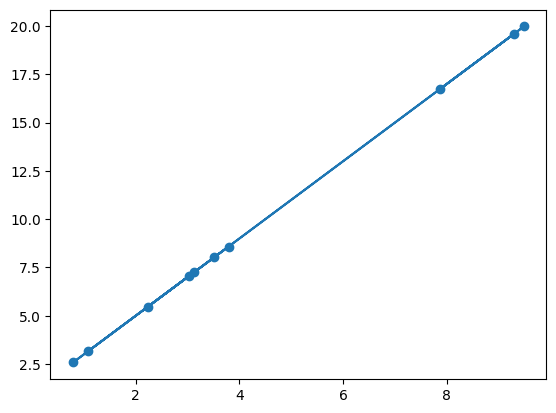

In [ ]:
def lineal(x,m,b):
    return m*x+b
valores= rng.uniform(0, 10, 10)
y_valores=lineal(valores,2,1)
plt.plot(valores,y_valores,"o-")



In [ ]:
print(f"la varianza de lo valores es :{np.var(valores)}")
print(f"la varianza de los valores de la recta es: {np.var(y_valores)}")
print(f"la convarianza de los valores es: {np.cov(valores, y_valores)[0, 1]}")
print(f"el coeficiente de correlación es: {np.corrcoef(valores,y_valores)[0,1]}") #revisar

la varianza de lo valores es :8.436089314401148
la varianza de los valores de la recta es: 33.74435725760459
la convarianza de los valores es: 18.746865143113663
el coeficiente de correlación es: 0.9999999999999999


In [ ]:
def sse_lineal(x,y,m,b,desviaciones_estandar):
  return np.sum((y-lineal(x,m,b))**2/desviaciones_estandar**2)

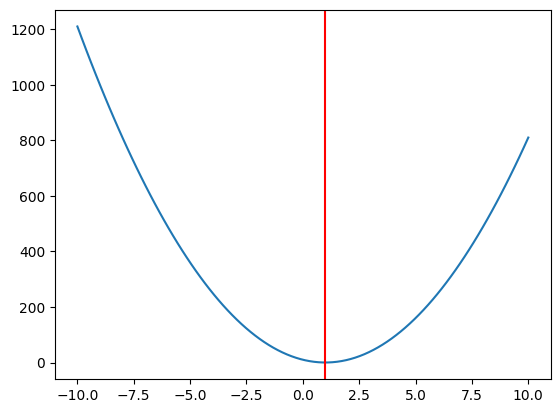

In [ ]:
ordenadas=np.linspace(-10,10,100)
desviaciones_estandar=np.array([1]*10)
sse_ordenadas=[]
for ordenada in ordenadas:
  sse_ordenadas.append(sse_lineal(valores,y_valores,2,ordenada,desviaciones_estandar)) #fijo m=2
plt.plot(ordenadas,sse_ordenadas)
plt.axvline(1,color="red",label="ordenada original")


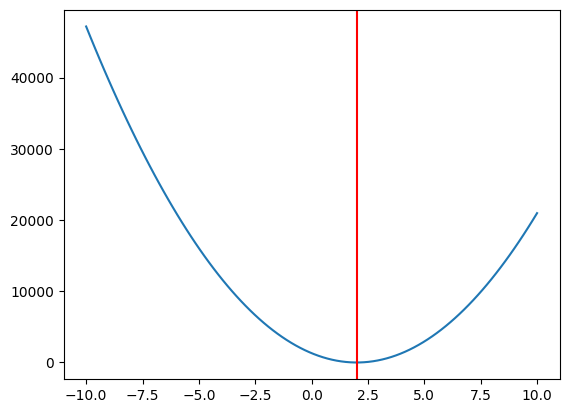

In [ ]:
pendientes=np.linspace(-10,10,100)
desviaciones_estandar=np.array([1]*10)
sse_pendientes=[]
for pendiente in pendientes:
  sse_pendientes.append(sse_lineal(valores,y_valores,pendiente,1,desviaciones_estandar)) #fijo b=1
plt.plot(pendientes,sse_pendientes)
plt.axvline(2,color="red",label="pendiente original")

Text(0, 0.5, 'ordenada')

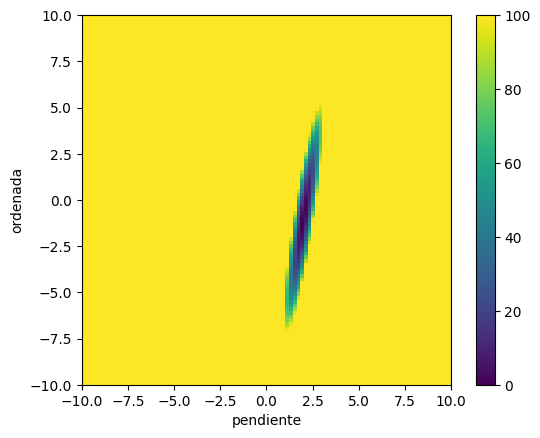

In [ ]:


lista=[]
for ordenada in ordenadas:
  lista_interna=[]
  for pendiente in pendientes:
    lista_interna.append(sse_lineal(valores,y_valores,pendiente,ordenada,desviaciones_estandar))
  lista.append(lista_interna)
lista=np.array(lista)
plt.imshow(lista,vmin=0,vmax=100,extent=[min(pendientes), max(pendientes), min(ordenadas), max(ordenadas)]) #representa las columnas y filas de la matriz #los azules oscuros son los valores mas bajos de sse
plt.colorbar()
plt.xlabel("pendiente")
plt.ylabel("ordenada")

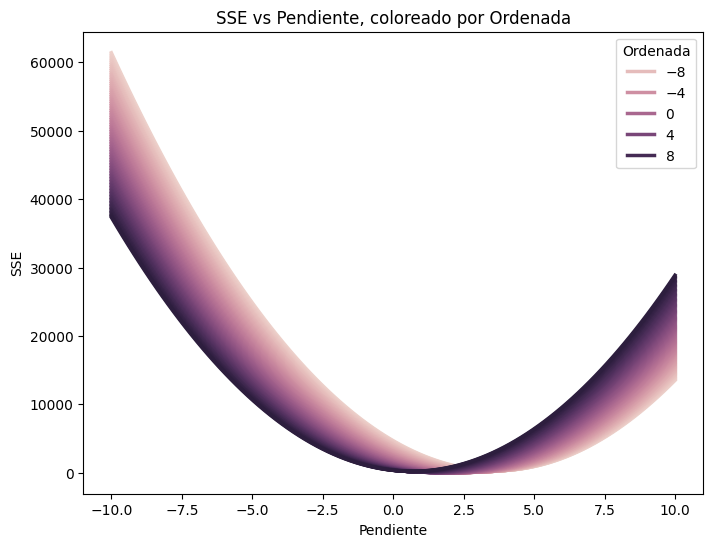

In [ ]:
df_lista=pd.DataFrame(lista)
df_lista.columns=pendientes
df_lista.index=ordenadas
data_long = df_lista.reset_index().melt(id_vars='index', var_name='pendiente', value_name='sse')
data_long.rename(columns={'index': 'ordenada'}, inplace=True)

plt.figure(figsize=(8,6))
lineplot = sns.lineplot(x='pendiente', y='sse', hue='ordenada', data=data_long, linewidth=2.5)

plt.xlabel("Pendiente")
plt.ylabel("SSE")
plt.title("SSE vs Pendiente, coloreado por Ordenada")
plt.legend(title="Ordenada")
plt.show()

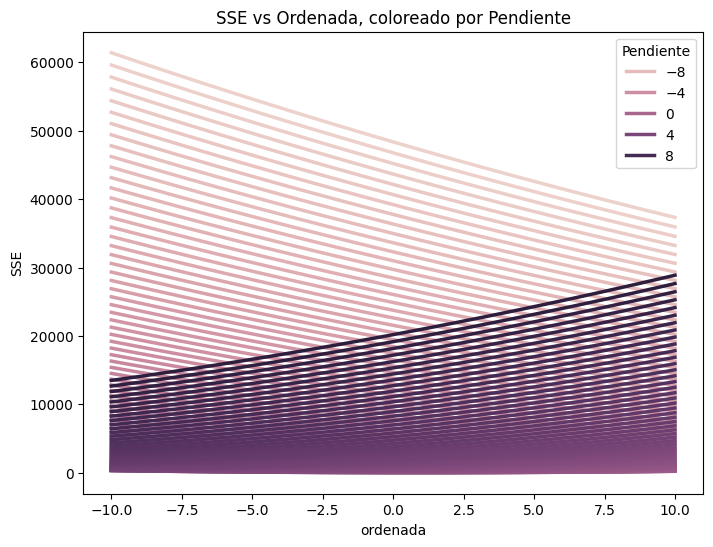

In [ ]:
plt.figure(figsize=(8,6))
lineplot = sns.lineplot(x='ordenada', y='sse', hue='pendiente', data=data_long, linewidth=2.5)

plt.xlabel("ordenada")
plt.ylabel("SSE")
plt.title("SSE vs Ordenada, coloreado por Pendiente")
plt.legend(title="Pendiente")
plt.show()

In [ ]:
#preguntar pasar de long a wide  y alreves

### Ruido 🔊📢💥

¿Cómo cambia lo que hemos obtenido hasta ahora si agregamos ruido?

**Para pensar en grupo**:
1. ¿Qué pensás que va a pasar con el $SSE_{red}$
2. ¿Qué pensás que va a pasar con la varianza de $x$ e $y$, la covarianza y el coeficiente de correlación?

Vamos a llamar $x_{TRUE}$ e $y_{TRUE}$ a que obtenemos sin ruido como en la sección anterior. Para obtener $x$ e $y$, agregale ruido a la variable $y_{TRUE}$ con una distribución normal con media en los valores verdaderos, y una desviación estandar ($\sigma$) que elijas.

1. Repetí los puntos 3 al 7 de la sección anterior. Varía la $\sigma$ y compará lo que ves con tus respuestas a las preguntas mas arriba.
2. Si el valor de $m$ y $b$ no se corresponde con el utilizado para simular, ¿Cómo es la distribución de los residuos en función del $x$?
3. Hacé un histograma del valor de los residuos. ¿Cómo cambia con $\sigma$?

**Para discutir**: ¿Qué utilidad tiene el parámetro seed en este caso?



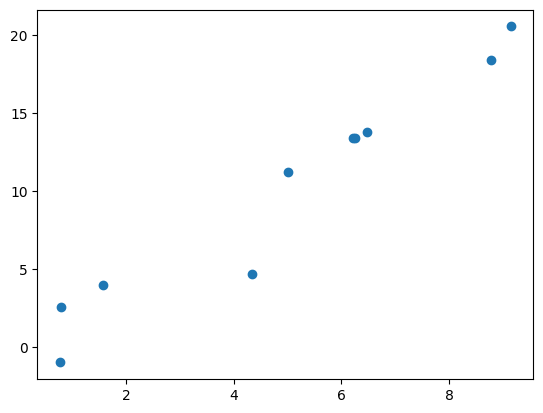

In [ ]:
numeros_random=rng.uniform(0, 10, 10)
y_valores=lineal(valores,2,1)
desviaciones = rng.uniform(0, 4, 10)
y_ruido=rng.normal(y_valores,desviaciones,10)
plt.plot(valores,y_ruido,"o") #ya no tenemos una recta

Text(0, 0.5, 'ordenada')

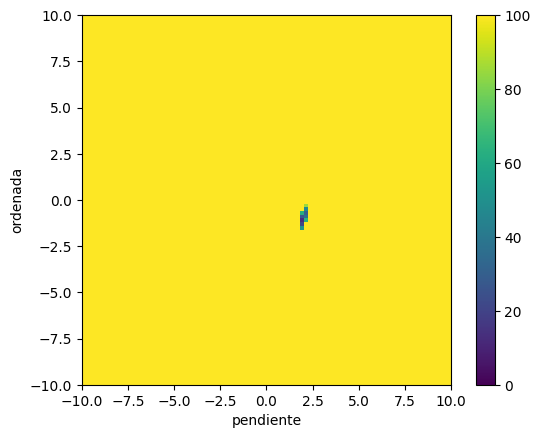

In [ ]:
ordenadas_ruido=np.linspace(-10,10,100)
pendientes_ruido=np.linspace(-10,10,100)

lista=[]
for ordenada in ordenadas_ruido:
  lista_interna=[]
  for pendiente in pendientes_ruido:
    lista_interna.append(sse_lineal(valores,y_ruido,pendiente,ordenada,desviaciones))
  lista.append(lista_interna)
lista=np.array(lista)
plt.imshow(lista,vmin=0,vmax=100,extent=[min(pendientes), max(pendientes), min(ordenadas), max(ordenadas)]) #representa las columnas y filas de la matriz #los azules oscuros son los valores mas bajos de sse
plt.colorbar()
plt.xlabel("pendiente")
plt.ylabel("ordenada")

### Ajuste (y regresión)

#### Usando la formula para pendiente y ordenada

1. Escribí una función que calcule los valores de $m$ y $b$ a partir de $x$ e $y$ (suponiendo un $\sigma$ uniforme) siguiendo las ecuaciones vistas en clase.
2. Ajustá los datos con ruido y compará los resultados obtenidos con los valores de $m$ y $b$ utilizados para simular los datos. ¿Son iguales? ¿Están cerca?
3. Grafica los resultados.

#### Usando polynomial fit de numpy

Usando la función **numpy.polynomial.polynomial.Polynomial.fit** de numpy (también está la función **numpy.polyfit** que es equivalente)
1. Ajustá los datos con ruido y compará los resultados obtenidos con los valores de $m$ y $b$ utilizados para simular los datos. ¿Son iguales? ¿Están cerca?
2. Grafica los resultados.
3. ¿Qué pasa cuando cambias $\sigma$?
4. ¿Que pasa cuando a algunos datos les pones un sigma chico y a otros un sigma grande?
5. ¿Cómo se calculan las incertezas para $m$ y $b$? Cuando hagas esto, compara con los graficos de SSE vs $m$ o $b$.

**Extra**: Generá datos con la ecuación de una parábola y ajustalos con una recta. ¿Qué pasa? ¿Cómo cambian los residuos?  ¿Cómo

#### Usando curve_fit de scipy

Usando la función **curve_fit** de scipy
1. Ajustá los datos con ruido y compará los resultados obtenidos con los valores de $m$ y $b$ utilizados para simular los datos. ¿Son iguales? ¿Están cerca?
2. Grafica los resultados.
3. ¿Cómo se calculan las incertezas para $m$ y $b$? Cuando hagas esto, compara con los graficos de SSE vs $m$ o $b$.


**Extra Bonus**: *curve_fit* realiza una busqueda iterativa del valor que minimiza el SSE. En cambio **Polynomial fit** aprovecha que la ecuación es lineal en los coeficientes para encontrar la solución es mejor para este caso. Por debajo, usa **np.linalg.lstsq** para armar manualmente la [matriz](https://en.wikipedia.org/wiki/Design_matrix). Implementá un ajuste lineal usando esta idea.

In [ ]:
def ajuste_lineal(x, y):
    n = len(x)
    sx = np.sum(x)
    sy = np.sum(y)
    sxx = np.sum(x**2)
    sxy = np.sum(x * y)

    denominador = n * sxx - sx**2
    m = (n * sxy - sx * sy) / denominador
    b = (sxx * sy - sx * sxy) / denominador

    return m, b

In [ ]:

y_rudio_uniforme=rng.normal(y_valores,1,10) #los que habia generado antes eran con sigmas no uniformes
m,b=ajuste_lineal(valores,y_rudio_uniforme)
print(m,b) #como mido la diferencia? ¿error? ¿error relativo?

2.0001517685496153 1.4347820542133995


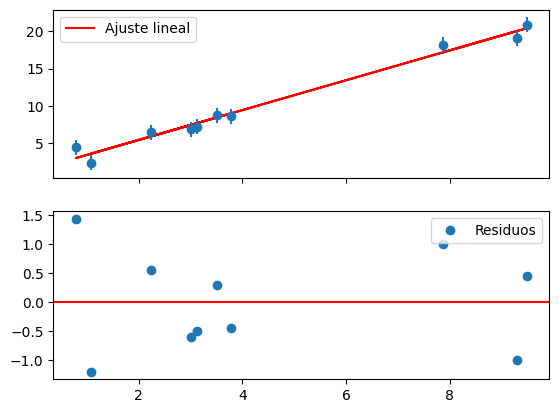

In [ ]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(valores,lineal(valores,m,b),label="Ajuste lineal",color="red")
ax[0].errorbar(valores,y_rudio_uniforme,yerr=1,fmt="o")
ax[0].legend()
ax[1].plot(valores,y_rudio_uniforme-lineal(valores,m,b),"o", label="Residuos")
ax[1].axhline(0,color="red")
ax[1].legend()

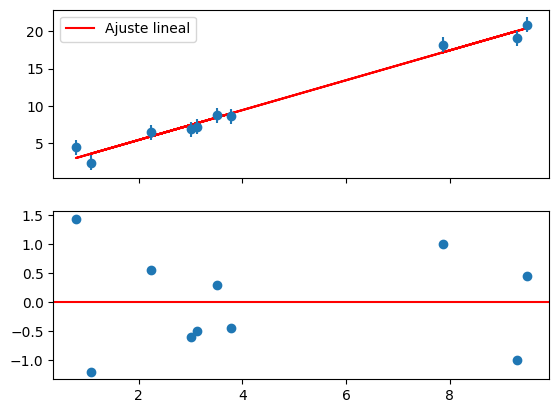

In [ ]:
#ahora con polyfit
p=np.polyfit(valores,y_rudio_uniforme,1)
m_ajuste=p[0]
b_ajuste=p[1]
y_predicho=lineal(valores,m_ajuste,b_ajuste)
residuos=y_rudio_uniforme-y_predicho
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(valores,y_predicho,label="Ajuste lineal",color="red")
ax[0].errorbar(valores,y_rudio_uniforme,yerr=1,fmt="o")
ax[0].legend()
ax[1].plot(valores,residuos,"o")
ax[1].axhline(0,color="red")


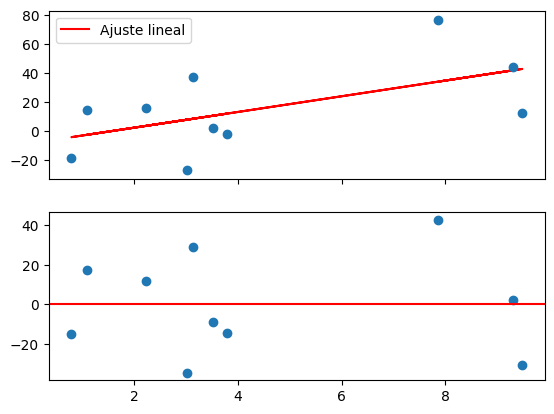

In [79]:
#aumentemos el sigma
y_rudio_uniforme=rng.normal(y_valores,30,10)
p=np.polyfit(valores,y_rudio_uniforme,1)
m_ajuste=p[0]
b_ajuste=p[1]
y_predicho=lineal(valores,m_ajuste,b_ajuste)
residuos=y_rudio_uniforme-y_predicho
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(valores,y_predicho,label="Ajuste lineal",color="red")
ax[0].errorbar(valores,y_rudio_uniforme,yerr=1,fmt="o")
ax[0].legend()
ax[1].plot(valores,residuos,"o")
ax[1].axhline(0,color="red") #va costando mas el ajuste

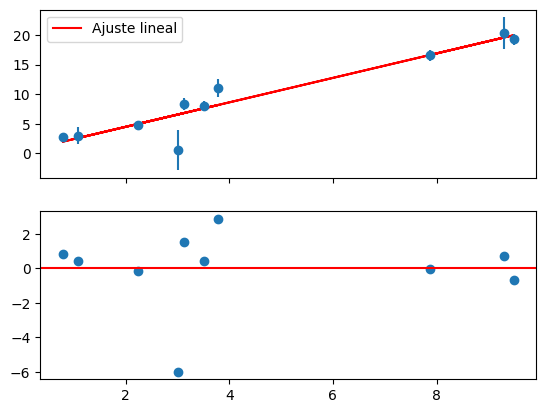

In [82]:
#distintos sigmas
y_valores=lineal(valores,2,1)
desviaciones = rng.uniform(0, 4, 10)
y_ruido=rng.normal(y_valores,desviaciones,10)
p=np.polyfit(valores,y_ruido,1)
m_ajuste=p[0]
b_ajuste=p[1]
y_predicho=lineal(valores,m_ajuste,b_ajuste)
residuos=y_ruido-y_predicho
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(valores,y_predicho,label="Ajuste lineal",color="red")
ax[0].errorbar(valores,y_ruido,yerr=desviaciones,fmt="o")
ax[0].legend()
ax[1].plot(valores,residuos,"o")
ax[1].axhline(0,color="red") #los que tienen mucha incerteza pesan menos



## Parsimonia

Se puede usar [F-test](https://en.wikipedia.org/wiki/F-test) (Ver sección Regression problems) para comparar un modelo simple con uno mas complejo.
1. ¿Cuál es la hipótesis nula?
2. Simulá y grafíca datos con ruido usando un la funcion $ 0.5 x^2 - x + 2 $ con 30 puntos uniformemente expaciados para $x$ entre -3 y 3.
3. Suma ruido normal con media 0 y desviación estandar 1. Graficá el resultado
4. Usando *polyfit* ajustá con distintos polinomios, desde grado 0 hasta 4 inclusive. Grafica todos los resultados. (Podrías usar *curve_fit* pero *polyfit* usa internamente *lstsq* y por lo tanto es mejor.)
5. ¿Cómo cambia el SSE a medida que se aumenta el grado del polinomio?. Grafica el resultado
6. Sin utilizar que sabes que el polinomio es de grado 2, utilizá el test para averiguar hasta que grado llegar.


In [ ]:
#asumo que la hipotesis nula es algo del estilo "agregar mas parametros no mejora el ajuste"

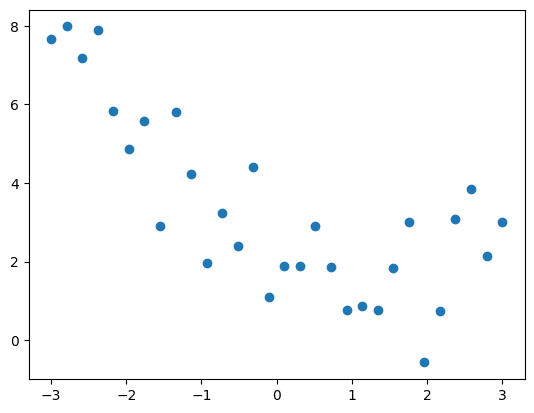

In [ ]:
datos=np.linspace(-3,3,30)
y=0.5*(datos**2)-datos+2
y_ruido=rng.normal(y,1,30)
plt.plot(datos,y_ruido,"o")

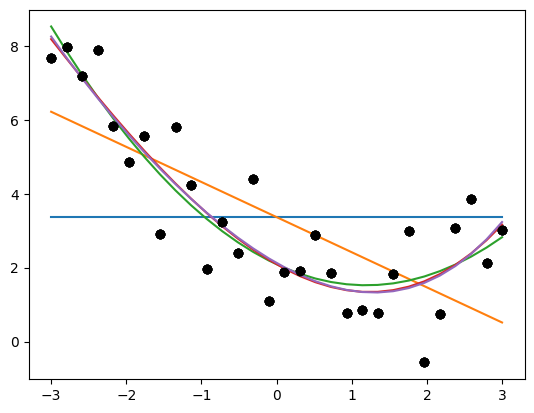

In [ ]:
for grado in range(5):
  modelo=np.polyfit(datos,y_ruido,grado) #encuentro los coef
  y_fit=np.polyval(modelo,datos) #"evaluo el polinomio"
  plt.plot(datos,y_fit,label=f"grado {grado}")
  plt.plot(datos,y_ruido,"o",color="black")


Text(0, 0.5, 'SSE')

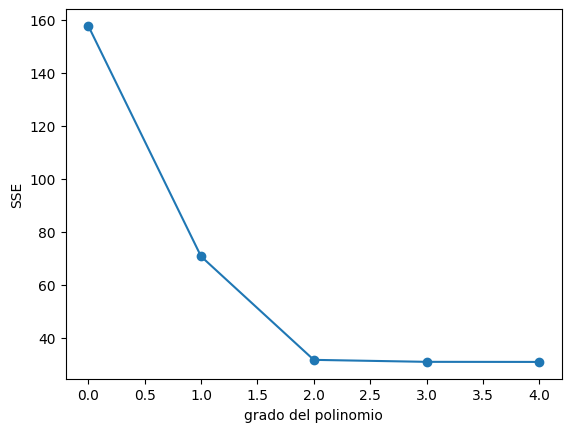

In [ ]:
#como cambia sse
sse=[]
for grado in range(5):
  modelo=np.polyfit(datos,y_ruido,grado) #encuentro los coef
  y_fit=np.polyval(modelo,datos) #"evaluo el polinomio"
  sse.append(np.sum((y_ruido-y_fit)**2))
plt.plot(sse, "o-")
plt.xlabel("grado del polinomio")
plt.ylabel("SSE") #muchos modelos frenan el ajuste en el "salto abrupto"

## Problema Extra: Ajuste de una combinación de funciones trigonométricas

1. Simulá y graficá datos usando la función $y = 2 \cos(x) - \sin(x)$ con valores para $x$ uniformemente distribuidos entre 0 y 2 $\pi$.
2. Sumá ruido normal con media 0 y desviación estándar 0.5. Graficá los puntos resultantes.
3. Usando `np.linalg.lstsq`, ajustá los datos al modelo $A \cos(x) + B \sin(x)$
4. Graficá los datos ruidosos junto con la curva ajustada.

También podrías usar `curve_fit`, pero como el modelo es lineal en los parámetros $A$ y $B$ conviene usar `np.linalg.lstsq`, que resuelve el ajuste de manera directa y eficiente. Sin embargo, probá *curve_fit*.

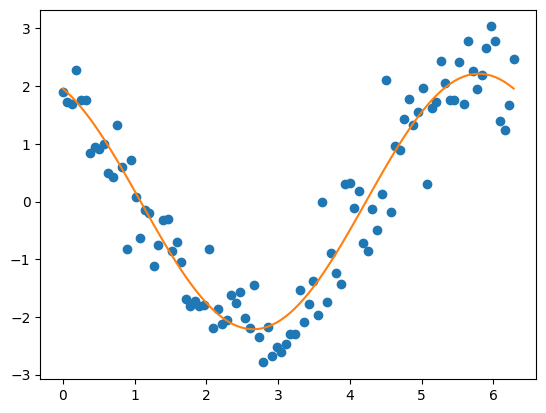

In [ ]:
x=np.linspace(0,2*np.pi,100)
y=2*np.cos(x)-np.sin(x)
y_ruido=rng.normal(y,0.5,100)
plt.plot(x,y_ruido,"o")
#ahora uso lstsq para resolver los coef. Para eso tengo que reescrbir el problema como la sol a Ax=b, donde x son los parametros que quiero encontrar.
#hay una rel lineal en los coef
#quiero M*[A = Y_RUIDO. entonces M= cos(x) sin(x) (para cada x)
#          B]
#np.vstack apila arrays en un nuevo array
#np.vstack(cos, sin)=[[cos....][sin...]]
#traspongo para que me quede M=[[cos,sin][cos,sin]...]
parametros, residuos, rango, singulares= np.linalg.lstsq(np.vstack([np.cos(x),np.sin(x)]).T,y_ruido) #resuelvo el sistema
#np me devuelve los parametros, suma de ,suma residuoas al cuadrado (sum(ax-b)**2), rango, y valores singulares.
#grafico la curva ajustada
y_ajustado=parametros[0]*np.cos(x)+parametros[1]*np.sin(x)
plt.plot(x,y_ajustado)

### Pinguinos

Un investigador patagónico sospecha que el largo y ancho del pico están correlacionados. Usando el dataset de pinguinos genera un gráfico de dispersión que visualice esta relación.

1. Calcular el coeficiente de correlación
2. Escribí un modelo linear para vincular estas dos magnitudes.
3. Ajustá los datos

**Para pensar en grupo**:
- ¿Qué evaluación hacen de los ajustes (residuos, $r^2$, etc)?
- ¿Debo separar los datos por especie?
- ¿Hay otra magnitudes que tengan relaciones similares?

**Extra**: Calculá nuevas columnas en las que les restas el valore medio correspondiente (ej. `x_nueva = x - mean(x)` ), y volvé a ajustar `x_nueva` e `y_nueva`. ¿Qué interpretación tienen ahora $m$ y $b$ del nuevo modelo? Discutir las ventajas y desventajas de hacer esto. Calcular el coeficiente de determinación para este nuevo modelo y comparar.

*Nota*: Seaborn tiene una forma muy simpática de generar un grafico con una linea de tendencia. Lamentablemente, es tán simpático como inutil.
```python
(
    so.Plot(data=df, x="bill_length_mm", y="bill_depth_mm", color="species")
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit(order=1))
)
```

In [ ]:
penguins= sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


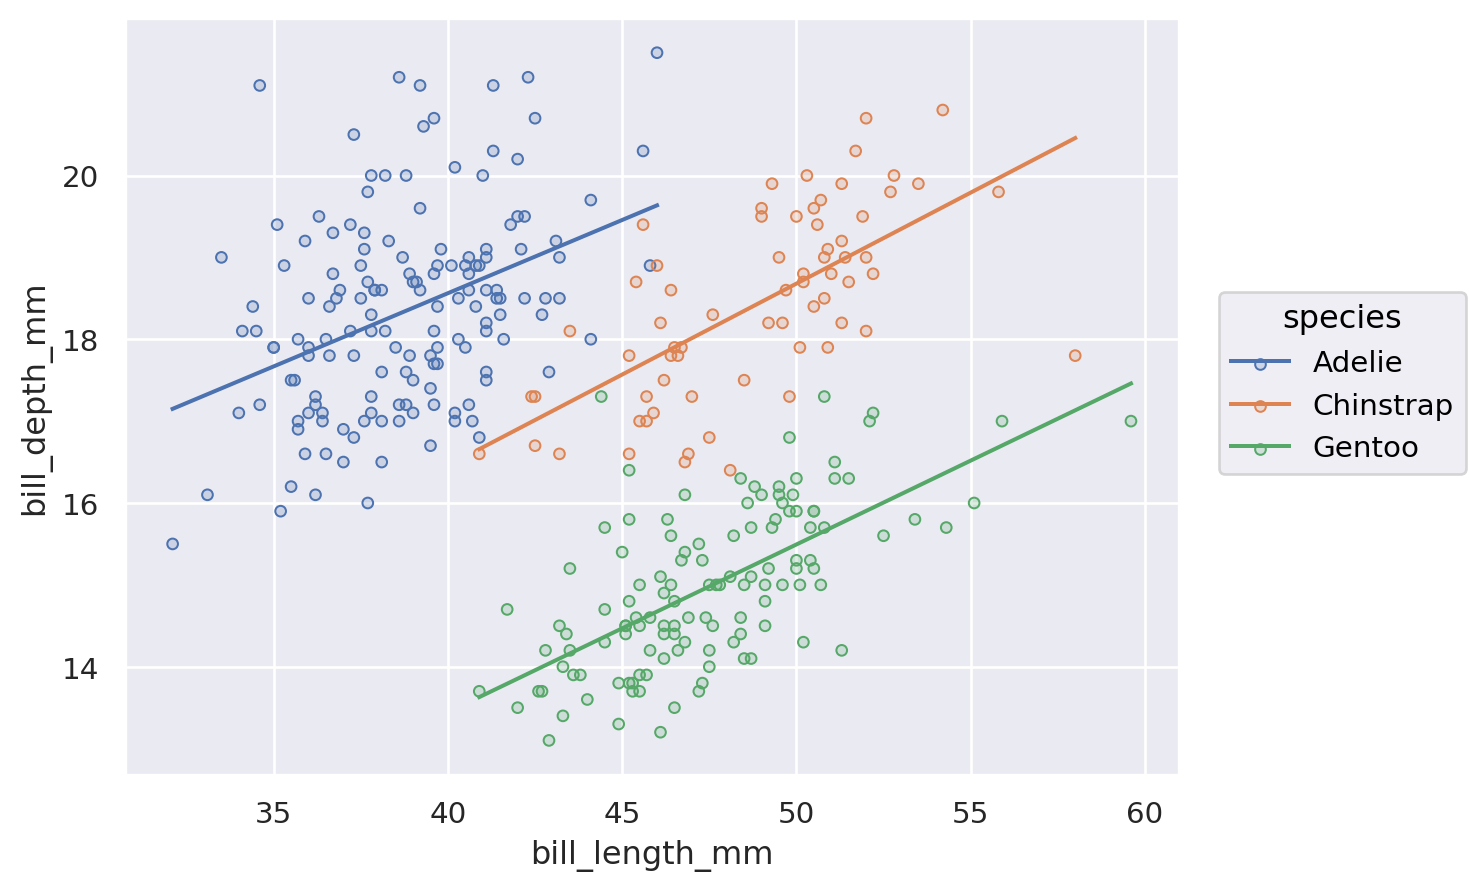

In [ ]:
so.Plot(data=penguins, x="bill_length_mm", y="bill_depth_mm", color="species").add(so.Dots()).add(so.Lines(), so.PolyFit(order=1)) #polynomial fit

In [ ]:
print(correlacion(penguins["bill_length_mm"],penguins["bill_depth_mm"])) #hacer por especie



NameError: name 'correlacion' is not defined